# (ADA) Homework 1: Scoring the Language Model Olympics

---

By the end of this homework, we expect you to be able to:

- Load data and handle data using pandas;
- Navigate the documentation of Python packages by yourself;
- Filter and tidy up noisy real-world datasets;
- Aggregate your data in different (and hopefully helpful) ways;
- Create meaningful visualizations to analyze the data;
- Communicate your findings in a clear and concise manner

---

**Important Dates.**

- Homework release: Fri 04 Oct 2024
- Homework due: Sat 18 Oct 2024, 23:59
- Grade release: Mon 04 Nov 2024

**Some rules**

- You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.
- Make sure you use the data folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)
- Be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice. To avoid confusion: use short comments for longer code answers.
- For questions containing the /Discuss:/ prefix, answer not with code, but with a textual explanation (in markdown).
- Back up any hypotheses and claims with data, since this is an important aspect of the course.
- Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master/main branch. If there are multiple notebooks present, we will not grade anything.
- We will not run your notebook for you! Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a fully-run and evaluated notebook. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
- In continuation to the previous point, interactive plots, such as those generated using the ‘plotly’ package, should be strictly avoided! Make sure to print results and/or dataframes that confirm you have properly addressed the task.

**A Note on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating. Fortunately, our job is not to police, but rather to educate! So, please consider the following:
- Presumably, you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!
- Some of the TAs on this course literally published many works on detecting machine-generated text.
---

## Context

Context
AI is booming! Newspapers, influencers, and your relatives all agree that AI is important. But while almost everyone agrees that AI is the future, much is unclear about what that future looks like…

Freshly graduated from the EPFL, you are hired by the Swiss government to advise on a large-scale “AI integration” initiative code-named **"NEUTRALITY"** (Navigating Efficient Upgrades Through Robust Artificial Learning Integration Techniques Yearly). Convinced by the stunning progress in language modeling, the government would like to battle the growing shortages in the education sector by using LMs. Your job description: investigate which LMs might be best suited!

You are given the results of three LMs on the [“Massive Multitask Language Understanding (MMLU)”](https://arxiv.org/abs/2009.03300) dataset to compare. This famous dataset consists of 57 subjects with multiple-choice questions, covering diverse subjects like mathematics, computer science, history, and law. Most providers of state-of-the-art LMs use this dataset to showcase the versatility of their latest models. Unfortunately, Horta-Ribeiro, the intern responsible for collecting the results, didn’t take EPFL’s famous ADA course. As a result, the collected datasets are slightly corrupted.

### A very brief primer on Language Models
Language models (LMs) are sophisticated statistical models designed to understand and generate human-like text. At their core, LMs are trained to predict the most likely continuation of a given input text. For example, given the input "The cat sat on the," an LM might predict "mat" as a likely continuation.
LMs are trained on vast text samples from various sources, including books, websites, and social media. This extensive training allows them to capture patterns and relationships in language, enabling them to generate coherent and contextually appropriate text across a wide range of topics and styles.

While LMs can produce text that appears to be written by intelligent humans, it's important to note that their capabilities can diverge from human intelligence in unexpected ways. They may sometimes generate factually incorrect information or struggle with complex reasoning tasks.

Two key concepts in understanding LMs are:
1. **Tokens**: LMs process text using "tokens" rather than individual characters. Tokens can be words, parts of words, or punctuation marks. For example, the sentence "I love AI!" might be tokenized as ["I", "love", "AI", "!"]. Tokenization is the first step in both training and using an LM.
2. **Context**: The input text provided to an LM is called the "context." This context informs the model's predictions or generations. A longer or more specific context often leads to more accurate and relevant outputs.

[See: Wikipedia entry on language models](https://en.wikipedia.org/wiki/Large_language_model)

###  Files for this assignment
This assignment is divided into three tasks, each of which should bring you a step closer to providing a recommendation toward project NEUTRALITY’s objectives:

- **Task 1**: Inspecting the results and getting your first model ranking
- **Task 2**: Inspecting the underlying data used to generate the results for possible biases
- **Task 3**: Learning about tokens and providing a final recommendation


```
📁 PROJECT_NEUTRALITY
│
├── 📄 analysis.ipynb (the file you're currently reading!)
├── 📄 requirements.txt (install into your environment)
│
├── 📁 task_1
├── 📁 task_2
└── 📁 task_2.5
```   
 

In [2]:
# please make sure you install the packages listed in the requirements.txt file in your environment!
# using pip
# pip install -r requirements.txt
#
# using Conda:
# conda create --name <env_name> --file requirements.txt
#
# some basic imports
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.stats import ttest_ind

## Task 1 (18 points): What's in an average anyway?

The files needed to complete task 1 can be found in the folder "`data/task_1/`:
```
task_1/
│
├── mmlu_data/
│   └── test.csv
│
└── lm_scores/
    ├── lm_X.csv
    ├── lm_Y.csv
    └── lm_Z.csv
```

We will start by loading, (manually) inspecting, and cleaning the data. Although it doesn't seem "glamorous" (nor is it particularly fun...) - manually inspecting data is extremely important! In fact, it's one of the few things most AI and Data Science researchers agree on :). Next, we will take a first pass on ordering our Olympic podium between three LMs.

### 1.1 (1 pt)
 
Load the subfiles contained in the `mmlu_data` and `lm_scores` folders into separate dataframes:
- `df_test`
- `df_x`
- `df_y`
- `df_z`

for each, print their sizes.

In [3]:
data_folder = 'ada-2024-homework-1-5ds/task_1/'
df_test = pd.read_csv(data_folder + 'mmlu_data/test.csv')

df_x = pd.read_csv(data_folder + 'lm_scores/lm_X.csv')
df_y = pd.read_csv(data_folder + 'lm_scores/lm_Y.csv')
df_z = pd.read_csv(data_folder + 'lm_scores/lm_Z.csv')

In [4]:
df_test.size

112336

In [5]:
df_x.size

27764

In [6]:
df_y.size

27956

In [7]:
df_z.size

27846

### 1.2 (4 pt)
Unfortunately, LMs don't always output the format we want. In the column `result`, the value should be one of A, B, C, or D. 

A. For each of the LM score dataframes, use a `value_counts()` operation and print the results. 

B. /Discuss:/ Inspect the results and describe the types of answer formats you see. Besides the "expected" case, you should be able to find at least four unexpected formats.

In [8]:
df_y['result'].value_counts()

result
D                                                                                                2894
Answer: D                                                                                        1718
C                                                                                                1701
B                                                                                                1240
D                                                                                                1145
                                                                                                 ... 
Where the energy of interaction between the atoms is at its minimum value, so the answer is A       1
leaves more viable offspring than others of its species., so the answer is D                        1
A and C only, so the answer is D                                                                    1
ADP + P → ATP, so the answer is D                                          

In [9]:
df_z['result'].value_counts()

result
D                                                                                   2257
C                                                                                   2191
B                                                                                   2127
A                                                                                   2060
Answer: D                                                                            777
                                                                                    ... 
omission of a universal suffrage clause, so the answer is D                            1
declare war, so the answer is D                                                        1
state and local governments, by means of federal funding, so the answer is B           1
less clearly identified with consistent political ideologies, so the answer is B       1
Rahit, so the answer is B                                                              1
Name: count, L

B)\
After we displayed the value count for the 3 LMs result we can see that it's not always the expected format A,B,C,D, we observe different formats :

In [10]:
df_x['result'].unique()

array(['B', 'C', 'D ', 'B ', 'Answer: B', 'A', 'Answer: D', 'Answer: C',
       'Answer: A', 'Not Sure', 'A ', 'C ', nan, 'D', 'None of the above',
       '3, so the answer is B',
       'is prevented from everting by papillary muscles., so the answer is B',
       'lingual branch of the mandibular trigeminal nerve., so the answer is A',
       'These craters contain the only permanently shadowed regions on Mercury, so the answer is D',
       'Unsafe practices, Wants, Fear, Trivial, so the answer is A',
       'phosphofructokinase., so the answer is D',
       'They provide access to phosphorus, an essential element that is limited in many kinds of soils., so the answer is C',
       'Lead to death due to an inability of the cell to pass electrons to oxygen, thus stopping aerobic respiration and asphyxiating the cells., so the answer is A',
       'creatine phosphorylation., so the answer is B',
       'Mass of the moon, so the answer is A', '5, so the answer is A',
       'True, True

1 - Some values in the result column contain a text followed or precced by the actual answer

2 - Since the answer is a string, there can be a space or no space after the answer letter, and this is counted differently, see example below, where the first one count the number of A with a space after and the second one without :

In [11]:
np.count_nonzero(df_x['result'] == 'A ')

1657

In [12]:
np.count_nonzero(df_x['result'] == 'A')

2733

As we can see when we do the np.unqique on df_x, some results doesnt have any answers and instead have not sure or none of the above or even a Nan

### 1.3 (5 pt)
Oh oh... That doesn't look great. Simply dropping all invalid answers seems overly wasteful, yet fixing all of these looks like a mess! Instead, let's focus for now on fixing just those answers of length < 10 characters that require only a single `str.replace()` operation. 

For example, if the answer looks like `--A--`, we could fix this by using the following simple function:

```
def clean_answer(s, pattern='-'):
    return str(s).replace(pattern, '')

dirty_answer = '--A--'
clean_answer = clean_answer(dirty_answer)
```

A. Filter the three score dataframes to include only answers with less than 10 characters. Make a deep copy of the dataframes as you filter them.

B. Modify the `clean_answer()` example function to clean the answers in the filtered data frames using the `apply()` functionality. Finally, make sure **all remaining answers are one of `A, B, C, or D`.**

C. /Discuss:/ Compare the sizes of the original and filtered data frames. What do you see? Why might this be a problem?

In [13]:
# A
df_x_filter = df_x.query('result.str.len() < 10 & result != "Not Sure"').copy(deep = True)
df_y_filter = df_y.query('result.str.len() < 10 & result != "Not Sure"').copy(deep = True)
df_z_filter = df_z.query('result.str.len() < 10 & result != "Not Sure"').copy(deep = True)

In [14]:
np.unique(df_x_filter['result'])

array(['A', 'A ', 'Answer: A', 'Answer: B', 'Answer: C', 'Answer: D', 'B',
       'B ', 'C', 'C ', 'D', 'D '], dtype=object)

In [15]:
# B
def clean_answer(s, pattern='Answer: '):
    return str(s).replace(pattern, '').strip()

df_x_filter['result'] = df_x_filter['result'].apply(clean_answer)
df_y_filter['result'] = df_y_filter['result'].apply(clean_answer)
df_z_filter['result'] = df_z_filter['result'].apply(clean_answer)

In [16]:
df_x_filter['result'] = df_x_filter['result'].apply(lambda s : clean_answer(s)).copy(deep = True).dropna()
df_y_filter['result'] = df_y_filter['result'].apply(lambda s : clean_answer(s)).copy(deep = True).dropna()
df_z_filter['result'] = df_z_filter['result'].apply(lambda s : clean_answer(s)).copy(deep = True).dropna()

Let's make sure the remaining answers are indeed A, B, C or D

In [17]:
df_x_filter['result'].value_counts()

result
A    5788
B    2965
C    2350
D    2333
Name: count, dtype: int64

In [18]:
df_x_filter.shape

(13436, 2)

In [19]:
df_y_filter['result'].value_counts()

result
D    5757
C    3242
B    2519
A    2033
Name: count, dtype: int64

In [20]:
df_x_filter.size

26872

In [21]:
df_y_filter.size

27102

In [22]:
df_z_filter.size

25506

In [23]:
df_z_filter['result'].value_counts()

result
D    3348
C    3255
B    3124
A    3026
Name: count, dtype: int64

In [24]:
pd.isnull(df_x_filter['result']).sum()

0

Seems like the clean answer worked

C. /Discuss:/

In [25]:
reduction_percentage_x = 100 - (df_x_filter.size / df_x.size) * 100
reduction_percentage_y = 100 - (df_y_filter.size / df_y.size) * 100
reduction_percentage_z = 100 - (df_z_filter.size / df_z.size) * 100

In [26]:
print(f'After we filtered the LM x answers, we had a size diminution of : {reduction_percentage_x}%')
print(f'After we filtered the LM y answers, we had a size diminution of : {reduction_percentage_y}%')
print(f'After we filtered the LM z answers, we had a size diminution of : {reduction_percentage_z}%')

After we filtered the LM x answers, we had a size diminution of : 3.2127935455986147%
After we filtered the LM y answers, we had a size diminution of : 3.05480040062956%
After we filtered the LM z answers, we had a size diminution of : 8.403361344537814%


LMs x and y had almost the same percentage of answers with less than 10 characters, but this cant be say for LM z that has more than twice the percentage amount of answers of length more than 10. This can lead to incorrect conclusions because of an unbalance dataset.

### 1.4 (3 pt)

Now that our answer columns are nicely formatted, let's take a look at model performance:

A. Both the `MMLU` dataframes and the language model score data frames have the columns `question_id`. For each of the language model score data frames, use an inner join operation with the `df_test` dataframe on the `question_id` column.

B. Add a new column to each of the resulting dataframes called `correct`, that checks if the model's answer in `result` is the same as the expected answer in the column `answer`. Then, print the average score of each model.

In [27]:
# A

In [28]:
df_x_merged = df_x_filter.merge(right = df_test, how = 'inner', on = 'question_id')
df_y_merged = df_y_filter.merge(right = df_test, how = 'inner', on = 'question_id')
df_z_merged = df_z_filter.merge(right = df_test, how = 'inner', on = 'question_id')

In [29]:
# B

In [30]:
df_x_merged['correct'] = df_x_merged['result'] == df_x_merged['answer']
df_y_merged['correct'] = df_y_merged['result'] == df_y_merged['answer']
df_z_merged['correct'] = df_z_merged['result'] == df_z_merged['answer']

In [31]:
score_x = (df_x_merged['correct'].sum()/(len(df_x_merged['correct'])))*100
score_y = (df_y_merged['correct'].sum()/(len(df_y_merged['correct'])))*100
score_z = (df_z_merged['correct'].sum()/(len(df_z_merged['correct'])))*100

In [32]:
print(f'In average the model x answers {score_x}% of the time correclty ')
print(f'In average the model x answers {score_y}% of the time correclty ')
print(f'In average the model x answers {score_z}% of the time correclty ')

In average the model x answers 76.74903245013397% of the time correclty 
In average the model x answers 74.58490148328536% of the time correclty 
In average the model x answers 66.3294911001333% of the time correclty 


### 1.5 (5 pt)

Hmmm, something doesn't seem quite right. Let's investigate how "balanced" this dataset is:

A. For each of the 57 subjects in the MMLU, compare the number of questions answered by each model. Print the subjects for which there is a more than 10% difference.

B. Propose and implement a reasonable way to rebalance the results. (e.g., while throwing away 100% of the results perfectly rebalances the results, it is not reasonable).

C. Finally, print the updated accuracy on the rebalanced data.

**hint:**:
- (A) For a given subject, let model X and model Y have answered 181 and 200 questions respectively. You can consider this a 10% difference from the perspective of X since: (200 - 181) / 181 > 0.10

In [33]:
df_x_merged

,question_id,result,question,A,B,C,D,answer,subject,correct
0,0,B,Find the degree for the given field extension ...,0,4,2,6,B,abstract algebra,True
1,1,C,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",8,2,24,120,C,abstract algebra,True
2,2,D,Find all zeros in the indicated finite field o...,0,1,"0,1","0,4",D,abstract algebra,True
3,3,B,Statement 1 | A factor group of a non-Abelian ...,"True, True","False, False","True, False","False, True",B,abstract algebra,True
4,4,B,Find the product of the given polynomials in t...,2x^2 + 5,6x^2 + 4x + 6,0,x^2 + 1,B,abstract algebra,True
...,...,...,...,...,...,...,...,...,...,...
13431,14037,A,What has been a central focus of religious tra...,Peace and harmony,Power and influence,Truth and love,Wisdom and ethics,A,world religions,True
13432,14038,A,To whom did ordinary folk appeal during a dro...,The Buddha,Laozi,The Queen Mother of the West,Confucius,C,world religions,False
13433,14039,B,The theological term homoousios means which o...,of a similar substance,of the same substance,of like substance,of human substance,B,world religions,True
13434,14040,B,"According to the Japanese origin myth, who giv...",Es,Izanagi,Izanami,Kami,B,world religions,True


In [34]:
# A
df_x_number_questions_per_subject = df_x_merged.groupby('subject').aggregate({"question_id" : 'count'}).rename(columns={'question_id': 'count'})
df_y_number_questions_per_subject = df_y_merged.groupby('subject').aggregate({"question_id" : 'count'}).rename(columns={'question_id': 'count'})
df_z_number_questions_per_subject = df_z_merged.groupby('subject').aggregate({"question_id" : 'count'}).rename(columns={'question_id': 'count'})

In [35]:
difference_x_y = (np.abs(df_x_number_questions_per_subject - df_y_number_questions_per_subject)/df_y_number_questions_per_subject).rename(columns={'count': 'percentage_difference'})
difference_x_z = (np.abs(df_x_number_questions_per_subject - df_z_number_questions_per_subject)/df_z_number_questions_per_subject).rename(columns={'count': 'percentage_difference'})
difference_y_z = (np.abs(df_y_number_questions_per_subject - df_z_number_questions_per_subject)/df_z_number_questions_per_subject).rename(columns={'count': 'percentage_difference'})

In [36]:
subject_difference_x_y = list(difference_x_y[difference_x_y['percentage_difference'] > 0.10].index)
subject_difference_x_z = list(difference_x_z[difference_x_z['percentage_difference'] > 0.10].index)
subject_difference_y_z = list(difference_y_z[difference_y_z['percentage_difference'] > 0.10].index)

In [37]:
different_subject = list(set(subject_difference_x_y + subject_difference_x_z + subject_difference_y_z))

In [38]:
print(f'The subjects where there is a number of questions difference more than 10 % are : {different_subject}')

The subjects where there is a number of questions difference more than 10 % are : ['moral scenarios', 'college computer science', 'formal logic', 'high school geography', 'medical genetics', 'logical fallacies', 'moral disputes', 'college chemistry', 'computer security']


In [39]:
# B

To rebalance the results we could see how many times the model is right for each subject and create randomly with the same correct subject percentage some answers to match the number of the other LMs.

Let's compute for each subject the average correct answer prediction

In [40]:
df_x_correct_percentage_subject = (df_x_merged.groupby('subject').aggregate({'correct' : 'sum'})/df_x_merged.groupby('subject').aggregate({'correct' : 'count'})).reset_index()
df_y_correct_percentage_subject = (df_y_merged.groupby('subject').aggregate({'correct' : 'sum'})/df_y_merged.groupby('subject').aggregate({'correct' : 'count'})).reset_index()
df_z_correct_percentage_subject = (df_z_merged.groupby('subject').aggregate({'correct' : 'sum'})/df_z_merged.groupby('subject').aggregate({'correct' : 'count'})).reset_index()

In [41]:
df_x_correct_percentage_subject

,subject,correct
0,abstract algebra,0.736842
1,anatomy,0.775194
2,astronomy,0.750000
3,business ethics,0.734694
4,clinical knowledge,0.791506
5,college biology,0.820144
6,college chemistry,0.750000
7,college computer science,0.752577
8,college mathematics,0.777778
9,college medicine,0.732143


In [42]:
subject_difference_x_z

['college chemistry',
 'college computer science',
 'high school geography',
 'moral disputes']

In [43]:
subject_difference_y_z

['college chemistry',
 'college computer science',
 'computer security',
 'medical genetics',
 'moral disputes',
 'moral scenarios']

Let's see for subject x, as we can see we have for subject x we dont have any unbalance subject compared to the others, because if we look at the difference of x with respect to y and z there is not subject that is present in both, which mean it is x and y that are at fault in those cases. Let's create enough data to match the average differences bewteen subject less than 10%

In [44]:
set(subject_difference_x_y).intersection(set(subject_difference_x_z))

set()

For LM y, we need to create more data for moral scenarios 

In [45]:
imbalance_subject = set(subject_difference_x_y).intersection(set(subject_difference_y_z))
imbalance_subject

{'moral scenarios'}

In [46]:
imbalance_subject = set(subject_difference_x_z).intersection(set(subject_difference_y_z))
imbalance_subject

{'college chemistry', 'college computer science', 'moral disputes'}

In [47]:
# C

## Task 2 (26 points): What do you mean A > D > B > C...?

Nice work! Having successfully inspected, cleaned, and rebalanced the provided data, you head over to director of the government's NEUTRALITY project. Ms. Sakota is happy with your work so far, but worried that the sloppy intern might have done more undetected damage. To be sure, she orders a new set of evaluations of all models on both MMLU and another dataset.

After cleaning up and rebalancing, you are left with the concatenated score files in the second folder `task_2`:
```
task_2/
│
└── lm_scores_mmlu.csv
│
└── lm_scores_other.csv
```

Each has a new column called `model_name`, which is one of `X, Y` or `Z`.



_NOTE: **only** use data from `task_2` and `task_2_5` for this assignment! The values in `lm_scores_mmlu.csv` will NOT be the same as the dataframes you finished in task 1. This is due to "randomness" or "temperature" in language model inference. This can slightly shift around generative results. (Conveniently: it also ensures any mistakes made in Task 1 don't propogate further ;) )_

In [48]:
# PROVIDED CODE
df_mmlu = pd.read_csv('ada-2024-homework-1-5ds/task_2/lm_scores_mmlu.csv')
df_other = pd.read_csv('ada-2024-homework-1-5ds/task_2/lm_scores_other.csv')

### 2.1 (4 pt)

Let's explore the new results:

A. Compute the mean accuracy and standard errors of each model on both datasets and print the results.

B. Then, show your results in a bar plot using standard errors with a 95% confidence interval around the mean. Make sure the plot is easy to read and well annotated.

C. /Discuss:/ the plot you created: (i) can you say that one of the models is the best? (ii) is there anything that seems odd?

In [49]:
df_mmlu

,result,question_id,question,A,B,C,D,answer,subject,correct,model_name
0,B,0,Find the degree for the given field extension ...,0,4,2,6,B,abstract algebra,True,X
1,C,1,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",8,2,24,120,C,abstract algebra,True,X
2,D,2,Find all zeros in the indicated finite field o...,0,1,"0,1","0,4",D,abstract algebra,True,X
3,B,3,Statement 1 | A factor group of a non-Abelian ...,"True, True","False, False","True, False","False, True",B,abstract algebra,True,X
4,D,7,Statement 1 | A ring homomorphism is one to on...,"True, True","False, False","True, False","False, True",D,abstract algebra,True,X
...,...,...,...,...,...,...,...,...,...,...,...
35083,A,14037,What has been a central focus of religious tra...,Peace and harmony,Power and influence,Truth and love,Wisdom and ethics,A,world religions,True,Z
35084,C,14038,To whom did ordinary folk appeal during a dro...,The Buddha,Laozi,The Queen Mother of the West,Confucius,C,world religions,True,Z
35085,B,14039,The theological term homoousios means which o...,of a similar substance,of the same substance,of like substance,of human substance,B,world religions,True,Z
35086,B,14040,"According to the Japanese origin myth, who giv...",Es,Izanagi,Izanami,Kami,B,world religions,True,Z


In [50]:
# A

In [51]:
df_mmlu['dataset'] = 'mmlu'
df_other['dataset'] = 'other'

combined_dataset = pd.concat([df_mmlu, df_other])
combined_dataset.groupby(['model_name', 'dataset']).aggregate({'correct' : 'mean'}).rename(columns={'correct' : 'mean'})

mean
model_name dataset          
X          mmlu     0.743588
           other    0.787976
Y          mmlu     0.761542
           other    0.720936
Z          mmlu     0.655951
           other    0.671721

In [52]:
combined_dataset.groupby(['model_name', 'dataset']).aggregate({'correct' : 'sem'}).rename(columns={'correct' : 'sem'})

sem
model_name dataset          
X          mmlu     0.004038
           other    0.006668
Y          mmlu     0.003941
           other    0.007317
Z          mmlu     0.004393
           other    0.007660

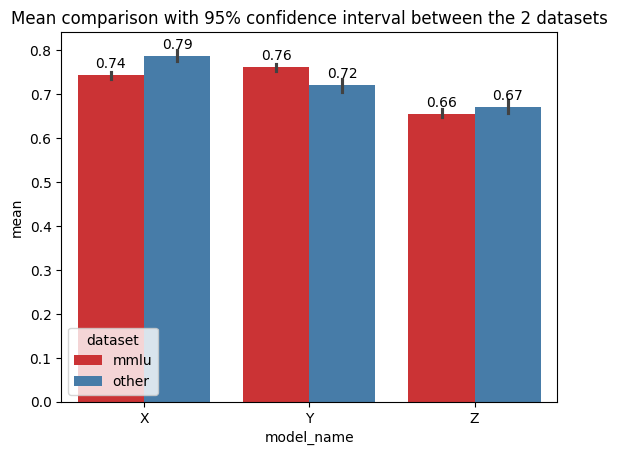

In [53]:
import seaborn as sns

axes = sns.barplot(combined_dataset, x = 'model_name', y = 'correct', hue="dataset", estimator='mean', errorbar=('ci', 95), palette = 'Set1')
# Adding annotations
for container in axes.containers:
    # Optional: you can filter the containers for the bars if there are other objects like error bars
    axes.bar_label(container, fmt='%.2f', padding=3)
plt.ylabel('mean')

plt.title('Mean comparison with 95% confidence interval between the 2 datasets')
plt.show()

C. /Discuss:/
We can't say for sure which model is the best between model X and model Y since the 2 models mean confidence interval intersect each other for both dataset.
Model z seems far less efficient, which is odd

### 2.2 (5 pt)

Ms. Sakota has assured you that both datasets contain questions of similar difficulty, so, what could be going on here?

A. What is the distribution of correct answers (A, B, C, D) for each dataset? Create a bar chart to visualize this.

B. Perform a chi-square test at $\alpha = 0.05$, of independence to determine if there's a significant difference in the distribution of correct answers between the two datasets. What do you conclude?

**hints**:
- for (A), keep in mind that df_mmlu and df_other contain the results of all models, i.e., the `question_id` column is duplicated.
- for (A), take care to clearly annotate the bar chart, e.g., title, y-label, legend.
- for (B), clearly state the null hypothesis and alternative hypothesis
- use the `chi2_contingency` function from `scipy.stats`
- format your results from answer (A) as a 2D array

In [54]:
# A

<Axes: xlabel='answer', ylabel='correct'>

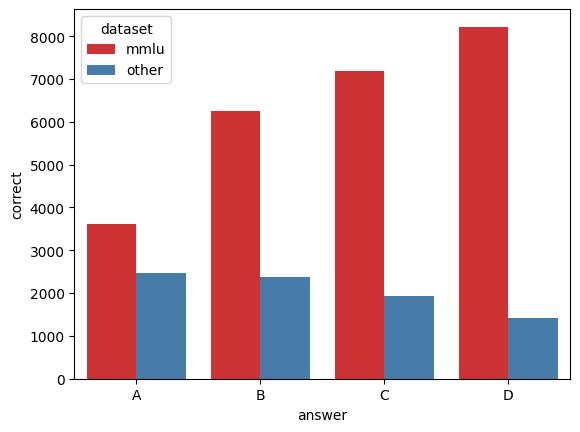

In [55]:
df_question = combined_dataset.groupby(['dataset', 'answer'])['correct'].sum()

sns.barplot(x='answer', y='correct', hue='dataset', data=df_question.reset_index(), estimator=np.mean, errorbar=('ci', 95), palette='Set1')

In [56]:
df_question = df_question.reset_index()

In [57]:
df_question

,dataset,answer,correct
0,mmlu,A,3608
1,mmlu,B,6264
2,mmlu,C,7182
3,mmlu,D,8222
4,other,A,2458
5,other,B,2386
6,other,C,1942
7,other,D,1411


In [58]:
pivot_correct_answers = df_question.pivot(index='dataset', columns='answer', values='correct')


array_2d = pivot_correct_answers.to_numpy()

In [59]:
pivot_correct_answers

answer,A,B,C,D
dataset,,,,
mmlu,3608,6264,7182,8222
other,2458,2386,1942,1411


In [60]:
array_2d

array([[3608, 6264, 7182, 8222],
       [2458, 2386, 1942, 1411]])

The null hypothesis is : The distribution are the same.
The alternative hypothesis would be : the distributions are different.

So we have to do a two sided test

In [61]:
# B
from scipy.stats import chi2_contingency

res = chi2_contingency(array_2d)

In [62]:
res.pvalue

0.0

In [63]:
res.dof

3

In [64]:
print(f'We can reject the null hypothesis at maximum {(1 - res.pvalue)*100}% significance')

We can reject the null hypothesis at maximum 100.0% significance


So we can't reject the null hypothesis, we should keep looking for another explanation of the data, since 0.05 < pvalue

### 2.3 (7 pt)

Let's dive in deeper:

A. What is language model X's mean accuracy conditioned on the four answer options for each dataset?

B. Compare LM X's performance when the correct answer is "A" between the two datasets. Use a T-test with CI = 0.95. What do you conclude?

C. Compare LM X's performance when the correct answer is "A" vs. "C or D" for each dataset. Use a T-test with CI = 0.95. What do you conclude?

In [65]:
# A
combined_dataset[combined_dataset['model_name'] == 'X'].groupby(['dataset', 'answer']).aggregate({'correct' : 'mean'}).reset_index().rename(columns={'correct' : 'mean'}).pivot(index='dataset', columns='answer', values='mean')

answer,A,B,C,D
dataset,,,,
mmlu,0.972688,0.799185,0.707905,0.633592
other,0.974026,0.806452,0.676407,0.603744


In [66]:
# B
performance_mmlu_A = combined_dataset[(combined_dataset['model_name'] == 'X') & 
                                      (combined_dataset['dataset'] == 'mmlu') & 
                                      (combined_dataset['answer'] == 'A')]['correct']

performance_other_A = combined_dataset[(combined_dataset['model_name'] == 'X') & 
                                       (combined_dataset['dataset'] == 'other') & 
                                       (combined_dataset['answer'] == 'A')]['correct']

t_stat, p_value = ttest_ind(performance_mmlu_A, performance_other_A)

In [67]:
t_stat

-0.21059510911432247

In [68]:
p_value

0.8332191972699248

p > 0.05 so we can't reject the null hypothesis, we have to keep looking

In [69]:
# C
performance_other_C_or_D = combined_dataset[(combined_dataset['model_name'] == 'X') & 
                                       (combined_dataset['dataset'] == 'other') & 
                                       (combined_dataset['answer'].isin(['C', 'D']))]['correct']

performance_mmlu_C_or_D = combined_dataset[(combined_dataset['model_name'] == 'X') & 
                                       (combined_dataset['dataset'] == 'mmlu') & 
                                       (combined_dataset['answer'].isin(['C', 'D']))]['correct']

In [70]:
t_stat_other, p_value_other = ttest_ind(performance_other_A, performance_other_C_or_D)

In [71]:
t_stat_mmlu, p_value_mmlu = ttest_ind(performance_mmlu_A, performance_mmlu_C_or_D)

In [72]:
p_value_other

5.900859805611251e-96

In [73]:
p_value_mmlu

5.334906497224946e-139

In [74]:
t_stat

-0.21059510911432247

p is very small, we have p < 0.05, we can reject the null hypothesis that is the distriubtion of answering A is the same as C or D. Which would mean that the model is biased on answers A.

### 2.4 (2 pt)

What an intriguing finding! 

A. Print the mean accuracies conditioned on the correct answer for all LMs for each dataset.

B. /Discuss:/ What do you observe?

In [75]:
# A
model_answer_accuracy = combined_dataset.groupby(['dataset', 'model_name', 'answer']).aggregate({'correct' : 'mean'}).reset_index().rename(columns={'correct' : 'accuracy'})
model_answer_accuracy.pivot(index=['dataset','model_name'], columns='answer', values='accuracy')

answer                     A         B         C         D
dataset model_name                                        
mmlu    X           0.972688  0.799185  0.707905  0.633592
        Y           0.623836  0.688073  0.733470  0.904252
        Z           0.643079  0.641182  0.669115  0.661139
other   X           0.974026  0.806452  0.676407  0.603744
        Y           0.625232  0.663978  0.762987  0.920437
        Z           0.680891  0.667563  0.662338  0.677067

B. /Discuss:/
The model X seems to work very well for question A and B in both dataset, TODO BIASED


### 2.5 (2 pt)

Concerned with your findings so far, you quickly consult with Ms. Sakota. After thinking it over, Ms. Sakota concludes that more tests are needed. She orders a second round of MMLU results. However, the clever Ms. Sakota thinks of the following twist: while keeping questions fixed, she randomly permutes the position of the correct answer. The new results can be found in the folder `data/task_2_5/`:
```
task_2_5/
│
└── lm_scores_mmlu_shuffle.csv
```

/Discuss:/ Why would Ms. Sakota do this?

She thinks that maybe the LLms learned that it's better to guess A,B than the other, so she wants to see if the suffle model will guess more on the answers that took the place of A, B in the non shuffle.

/Discuss:/

### 2.6 (4 pt)

Increasingly sceptical of the language models' performance, you read up on proper testing practices. You stumble upon the concept of [test-rested stability](https://en.wikipedia.org/wiki/Repeatability), which roughtly states that:

"_Measurements taken by a single person or instrument on the same item, under the same conditions, and in a short period of time, should have the same results._"

In our case, we would assume an LM would have the same performance on a given question regardless of the correct answer position. One way of testing this is by using the following metric:

$$\text{test-retest metric} = \frac{1}{N}\sum_{i=1}^N \frac{1}{M}\sum_{j=1}^M c^i_0 c_j^i,$$

where $c^i_0 \in \{0, 1\}$ indicates whether the model answers the $i^{\text{th}}$ question correctly (1 if correct, 0 if incorrect). $c_j^i$ indicates whether the model answers the $i^{\text{th}}$ question correctly in the $j^{\text{th}}$ shuffled version of the answer label content. Finally, $M$ is the total number of shuffles and $N$ is the dataset size.

Task: compute the test-retest metric for each language model using the original `lm_scores_mmlu.csv` file and the new `lm_scores_mmlu_shuffle.csv` file. Using a bar plot, visualize your results by comparing the accuracy of the original `lm_scores_mmlu.csv` and the test-retest scores.

**hints**
- what is $M$ in our case?

(bonus: no points, but so much sweet, sweet knowledge - check out [the following article](https://arxiv.org/pdf/2406.19470v1))

In our case we have M = 1 because we only have one shifted version.

In [76]:
df_mmlu_shuffle = pd.read_csv('ada-2024-homework-1-5ds//task_2_5/lm_scores_mmlu_shuffle.csv')

In [77]:
test_retest_metric = np.mean(df_mmlu_shuffle['correct']*df_mmlu['correct'])

In [78]:
print(f'The test retest metric is {test_retest_metric}')

The test retest metric is 0.5338862289101687


### 2.7 (2 pt)

A. Using the unshuffled data: For each LM, print the distribution of the answers they give as well as the accuracy conditioned on the answer they give.

B. /Discuss:/ Describe what you observe

[bonus: not scored, but again _that sweet, sweet knowledge_] Could you think of a plausible explanation?

In [79]:
# A
df_mmlu_stats = df_mmlu.groupby(['model_name', 'result']).agg(
    distribution=('result', 'count'),  # Count the occurrences of each result
    accuracy=('correct', 'mean')       # Calculate the mean accuracy
).reset_index()


total_count = df_mmlu_stats.groupby('model_name')['distribution'].transform('sum')


In [80]:
df_mmlu_stats.pivot(index= 'model_name', columns='result', values=['accuracy', 'distribution'])

accuracy                               distribution          \
result             A         B         C         D            A       B   
model_name                                                                
X           0.367927  0.884543  1.000000  1.000000       4259.0  2659.0   
Y           0.937500  0.897606  0.827861  0.631608       1072.0  2256.0   
Z           0.476103  0.654073  0.703429  0.727487       2176.0  2885.0   

                            
result           C       D  
model_name                  
X           2409.0  2369.0  
Y           3015.0  5353.0  
Z           3237.0  3398.0

B. /Discuss:/

## Task 3 (16 points): What do Questions and Answers look like for a Language Model?

While you feel pretty good about the tests you conducted so far, something still bothers you: what if the language models don't see the data like you do? Suddenly, you receive a phone call from a wise AI sage in the West, _Westoda_:

```
"Hmm, correct you are, young padawan, to question how the world is seen by large language models! Simple 'text' it is not, hmm? No, no, no! Characters and words, the way of puny humans, this is not, heh heh heh.

'Tokens', they use, yes! Mysterious and powerful, these tokens are. Expand our vocabulary, they do, beyond the simple 'a to Z'. Chunky blocks of text, they become, yes! 'Hello world', a simple phrase it may seem. But to a language model, '[24912, 2375]' it might appear, yes! Confusing, it is, hmm?

Wise, it would be, to explore these MMLU data points through the eyes of a language model, you think? Yes, yes! Much to learn, there is. The ways of the tokens, understand you must, if truly comprehend the great LMs, you wish to.
Meditate on this, you should. The force of natural language processing, strong it is. But patience, you must have, my young padawan. For only through great study and contemplation, will the mysteries of the tokens reveal themselves to you, they will. Yes, hmmm!"
```

Admittingly, Westoda at times speaks in riddles… However, he was explaining a crucial aspect of modern LMs called [Tokenization](https://learn.microsoft.com/en-us/dotnet/ai/conceptual/understanding-tokens):


“Tokens are words, character sets, or combinations of words and punctuation that are used by [language models (LMs)] to decompose text into. Tokenization is the first step in training”

Instead of characters, LMs process natural language using “tokens”. While this is useful for a number of reasons, it does at times introduce some “unintuitive” behavior…

In [81]:
# PROVIDED CODE

try:
    import tiktoken
except Exception as e:
    print('installing tiktoken package')
    
    !pip install tiktoken
    
    import tiktoken

def tokenize_text(s):
    enc = tiktoken.encoding_for_model('gpt-4o')
    tokens = enc.encode(str(s))
    return tokens

example_string = 'hello world'
print(f'humans see: "{example_string}" --> language models see: {tokenize_text(example_string)}')

humans see: "hello world" --> language models see: [24912, 2375]


### 3.1 (5 pt)

Use the provided code in the cell above to "see the world through the eyes of a language model":

A. Tokenize the questions of the original MMLU data provided in task 1: `task_1/mmlu_data/test.csv` and plot the token distribution (the frequency of each token).

B. Same as (A), but now for the answers in columns (columns "A", "B", "C", and "D").

C. Isolate the tokens for the strings "A", "B", "C", and "D", then, for their occurances in both questions and answers, print their relative distribution to each other.

**hint**
- There are a _lot_ of tokens, consider using a cutoff point and log scale
- For (c), they should sum to 1

In [82]:
# A
cutoff_frequency = 10000
tokens = df_test['question'].apply(tokenize_text).explode()
frequency = tokens.value_counts(normalize = True).head(cutoff_frequency)

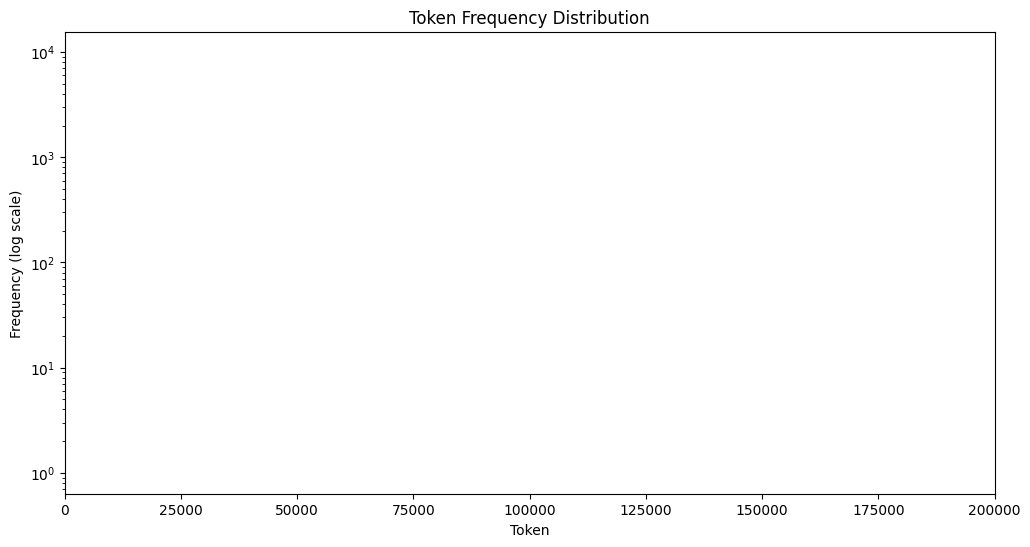

In [83]:
plt.figure(figsize=(12, 6))
sns.histplot(frequency, bins=100, kde=False)
plt.xlim(0, 200000)
plt.yscale('log')
plt.title('Token Frequency Distribution')
plt.xlabel('Token')
plt.ylabel('Frequency (log scale)')
plt.show()

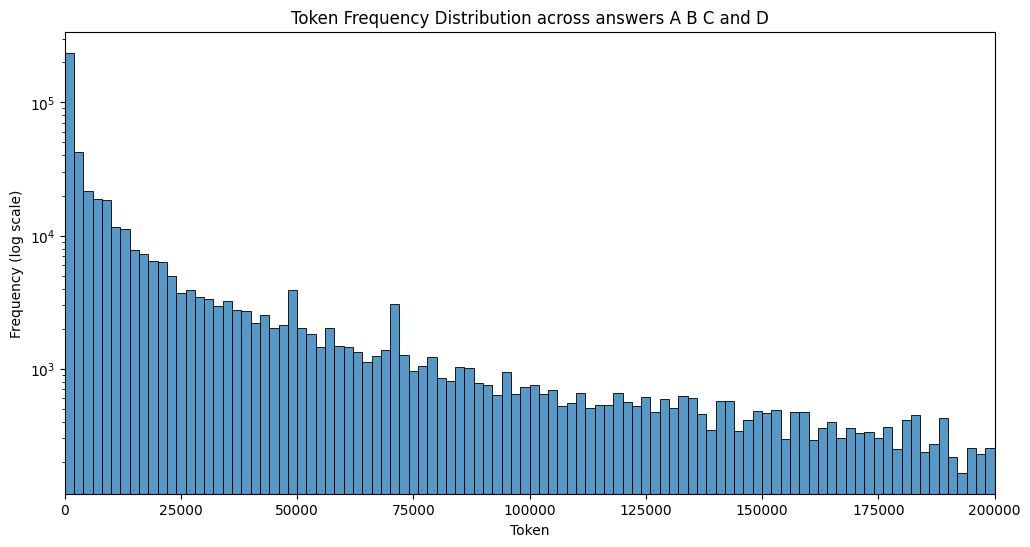

In [84]:
# B
tokens_A = df_test['A'].apply(tokenize_text).explode()
tokens_B = df_test['B'].apply(tokenize_text).explode()
tokens_C = df_test['C'].apply(tokenize_text).explode()
tokens_D = df_test['D'].apply(tokenize_text).explode()


combined_tokens = (list(tokens_A) + list(tokens_B) + list(tokens_C)+ list(tokens_D))

plt.figure(figsize=(12, 6))
sns.histplot(combined_tokens, bins=100, kde=False)
plt.xlim(0, 200000)
plt.yscale('log')
plt.title('Token Frequency Distribution across answers A B C and D')
plt.xlabel('Token')
plt.ylabel('Frequency (log scale)')
plt.show()

In [98]:
np.sum(np.isnan(list(combined_tokens)))

0

In [86]:
# C
token_A = tokenize_text("A")[0]
token_B = tokenize_text("B")[0]
token_C = tokenize_text("C")[0]
token_D = tokenize_text("D")[0]

combined_tokens_answers_questions = list(tokens) + combined_tokens

occurence_A = combined_tokens_answers_questions.count(token_A)
occurence_B = combined_tokens_answers_questions.count(token_B)
occurence_C = combined_tokens_answers_questions.count(token_C)
occurence_D = combined_tokens_answers_questions.count(token_D)

total_occurences = occurence_A + occurence_B + occurence_C + occurence_D

print(f'A has a distribution of {occurence_A/total_occurences}')
print(f'B has a distribution of {occurence_B/total_occurences}')
print(f'C has a distribution of {occurence_C/total_occurences}')
print(f'D has a distribution of {occurence_D/total_occurences}')

A has a distribution of 0.7916865742952699
B has a distribution of 0.06020066889632107
C has a distribution of 0.10152890587673197
D has a distribution of 0.046583850931677016


### 3.2 (3 pt)

What if the number of "A", "B", "C", and "D" tokens in the question and answer pairs could influence a language model's decisions?

A. For each combined question-answers pair, compute: 
1. the number of "A", "B", "C", and "D" tokens; and
2. the total number of tokens.
3. then, group by the "correct" answer and compute the mean frequency of A, B, C, and D tokens and the total number of tokens. 
4. finally, print your results

B. /Discuss:/ What do you think of the hypothesis that the frequency of A, B, C, and D tokens could influence answers?


In [87]:
df_test.head(1)

,question,A,B,C,D,answer,subject,question_id
0,Find the degree for the given field extension ...,0,4,2,6,B,abstract algebra,0


In [88]:
df_test['tokens'] = df_test['A'].apply(tokenize_text)+df_test['B'].apply(tokenize_text)+df_test['C'].apply(tokenize_text)+df_test['D'].apply(tokenize_text)+df_test['question'].apply(tokenize_text)


In [89]:
df_test.keys()

Index(['question', 'A', 'B', 'C', 'D', 'answer', 'subject', 'question_id',
       'tokens'],
      dtype='object')

In [90]:
df_test['total_token_number'] = df_test['tokens'].apply(len)

In [91]:
# A
df_test['token_A'] = df_test['tokens'].apply(lambda x : x.count(token_A))
df_test['token_B'] = df_test['tokens'].apply(lambda x : x.count(token_B))
df_test['token_C'] = df_test['tokens'].apply(lambda x : x.count(token_C))
df_test['token_D'] = df_test['tokens'].apply(lambda x : x.count(token_D))


In [92]:
df_test.groupby('answer').agg(frequency_A=('token_A', 'mean'),frequency_B=('token_B', 'mean'),frequency_C=('token_C', 'mean'),frequency_D=('token_D', 'mean'),mean_token_number=('total_token_number', 'mean'))

,frequency_A,frequency_B,frequency_C,frequency_D,mean_token_number
answer,,,,,
A,0.243017,0.018932,0.025140,0.013035,93.187151
B,0.231947,0.019642,0.029463,0.012709,88.846332
C,0.226410,0.018984,0.034897,0.015355,92.653825
D,0.242850,0.014566,0.030985,0.014301,92.110169


B. /Discuss:/
It doesn't seem like it because every tokens have almost the same frequency in each answer cases, so it doesn't seem like influencing the model.

### 3.3 (4 pt)

Three of the most important considerations when deciding between language models are:

Quality
Costs
Speed

So far, much of your analysis has focused on quality. However, the government has indicated that they are quite concerned about both the total costs and speed as well. Specifically, it has been brought to their attention that a new `turbo` model has been launched! 

This model is both cheaper and faster than the models you evaluated so far. However, there is a catch: the context length* is much smaller than that of the other LMS. Namely, it can only process **300** tokens during inference. Meanwhile, the other models can process up to 100K tokens! 

*_The “context length” refers to the number of tokens that can be given to an LM as input._

A. Are there subjects where using the cheaper model might be problematic? I.e., where part of the question and answer(s) might not fit completely in the context?

B. /Discuss:/ Can you think of a strategy that would balance the needs of the government?

**hint**:
- An LM needs to have both the question and the different answer options in its context

In [93]:
# A
max_subject_token = df_test.groupby('subject').agg(max_token_number = ('total_token_number', 'max'))

In [94]:
problematic_subject = max_subject_token[max_subject_token['max_token_number'] > 300]

In [95]:
for subject in problematic_subject.index : 
    print(f'It would be problematic for this subject : {subject}')

It would be problematic for this subject : college medicine
It would be problematic for this subject : high school computer science
It would be problematic for this subject : high school european history
It would be problematic for this subject : high school statistics
It would be problematic for this subject : high school us history
It would be problematic for this subject : high school world history
It would be problematic for this subject : professional law
It would be problematic for this subject : professional medicine
It would be problematic for this subject : security studies
It would be problematic for this subject : virology


B. /Dicsuss:/
We could use a combination of several models, if the tokens are less than 300 use the faster model else use another model.

### 3.4 (4 pt)

/Discuss:/ The time has come to give your final recommendation on the use of LMs in education to the government! Taking into account everything you analyzed in all the preceding tasks (1, 2, and 3), please write a short recommendation consisting of 4 bullet points discussing your concerns.

**hint**
- Try to use the MECE framework: _Mutually Exclusive Collectively Exhaustive_

/Discuss:/
1. 

2. 

3. 

4. 